In neural networks, layers are composed of nodes/neurons that perform specific computations. Each layer typically has a specific function:

1. Input Layer: Receives input data.
2. Hidden Layers: Perform intermediate computations.
3. Output Layer: Produces the final output.

Layers enable neural networks to learn complex patterns and relationships within data by transforming input data through a series of mathematical operations.

In [13]:
# Importing Required Libraries
from sklearn.datasets import make_blobs
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

import warnings
warnings.filterwarnings("ignore")

Layers=1: 1.000
Layers=2: 1.000
Layers=3: 0.838
Layers=4: 0.998
Layers=5: 0.650


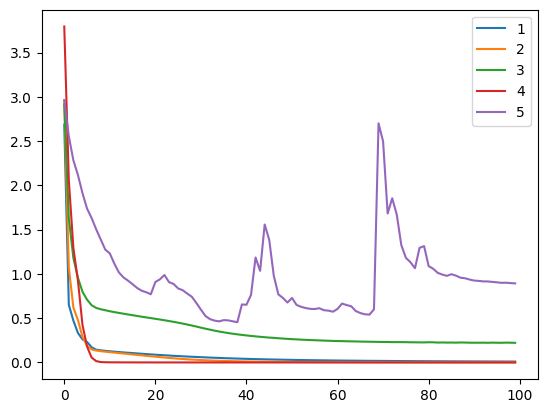

In [14]:
# Preparing the Multi-Class-Classification Dataset
def create_dataset():

    # Generating the 2D classification dataset
    X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2, random_state=2)

    # Using one-hot encoding on the output variable
    y = to_categorical(y)

    # Observations
    n_train = 500

    # Splitting the data into training & testing
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

# Fit the model with given number of layers, Return the test data accuracy
def evaluate_model(n_layers, trainX, trainy, testX, testy):

    # Configuring the data
    n_input, n_classes = trainX.shape[1], testy.shape[1]

    # Building the model
    model = Sequential()
    model.add(Dense(10, input_dim=n_input, activation="relu", kernel_initializer="he_uniform"))

    for _ in range(1, n_layers):         # n_layers means how many layers we want we can add
        model.add(Dense(10, activation="relu", kernel_initializer="he_uniform"))
    model.add(Dense(n_classes, activation="softmax"))

    # Compile the model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

    # Fitting the model
    history = model.fit(trainX, trainy, epochs=100, verbose=0)

    # Evaluate the model on test data
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return history, test_acc

# Create and get the dataset
trainX, trainy, testX, testy = create_dataset()

# Evaluate and plot the learning curve of model with given num of layers
all_history = list()
num_layers = [1, 2, 3, 4, 5]
for n_layers in num_layers:

    # Evaluating the model with given number of layers
    history, result = evaluate_model(n_layers, trainX, trainy, testX, testy)

    # Display the result
    print("Layers=%d: %.3f" % (n_layers, result))

    # Plotting the Learning Curve
    pyplot.plot(history.history["loss"], label=str(n_layers))
pyplot.legend()
pyplot.show()


- In above results we can see that the results are fluctuating.
- We can take the layer 3,5 there is incresing in complexity and these are not giving the ligh levels of accuray.
- Now, we can decide what layers are suatible for our Neural Network Model which is Layer 1,2,4.
- By selecting the above layers 1,2,4 we can proceed with prediction.